In [1]:
%matplotlib inline
from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import os

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

In [2]:
# set up file names and pathes
data_dir = '.'
data_type = 'train2017'
ann_file = '%s/annotations/captions_%s.json'%(data_dir, data_type)
resFile = '%s/model_predictions.json'%(data_dir)

# download Stanford models
!./get_stanford_models.sh

Found Stanford CoreNLP.


In [3]:
# fix for MSCOCO 2017 dataset
with open(ann_file, 'r') as f:
    data = json.load(f)
    data['type'] = 'captions'
    
with open(ann_file, 'w') as f:
    json.dump(data, f)

In [3]:
# create coco object and cocoRes object
coco = COCO(ann_file)
cocoRes = coco.loadRes(resFile)

loading annotations into memory...
0:00:02.199445
creating index...
index created!
Loading and preparing results...     
DONE (t=0.17s)
creating index...
index created!


In [4]:
# create cocoEval object by taking coco and cocoRes
cocoEval = COCOEvalCap(coco, cocoRes)

# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
cocoEval.params['image_id'] = cocoRes.getImgIds()

# evaluate results
# SPICE will take a few minutes the first time, but speeds up due to caching
cocoEval.evaluate()

tokenization...
setting up scorers...
computing Bleu score...
{'reflen': 48667, 'guess': [49427, 44427, 39427, 34427], 'testlen': 49427, 'correct': [33199, 16114, 7133, 3290]}
ratio: 1.01561633139
Bleu_1: 0.672
Bleu_2: 0.494
Bleu_3: 0.353
Bleu_4: 0.255
computing METEOR score...
METEOR: 0.232
computing Rouge score...
ROUGE_L: 0.499
computing CIDEr score...
CIDEr: 0.824
computing SPICE score...
SPICE: 0.159


In [5]:
# print output evaluation scores
for metric, score in cocoEval.eval.items():
    print '%s: %.3f'%(metric, score)

CIDEr: 0.824
Bleu_4: 0.255
Bleu_3: 0.353
Bleu_2: 0.494
Bleu_1: 0.672
ROUGE_L: 0.499
METEOR: 0.232
SPICE: 0.159


ground truth captions
Two elephants standing next to each other in a jungle forest. 
Two elephants playing in the water and mud.
Two elephants are walking through the mud in a clearing.
Two elephants getting a drink from muddy water.
Two brown elephants walking through mud in a jungle. 


generated caption (CIDEr score 0.3)
an elephant walking through a lush green forest


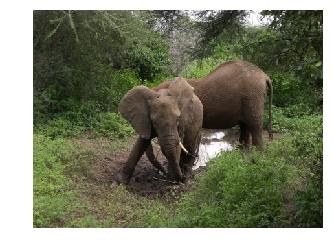

In [6]:
# demo how to use evalImgs to retrieve low score result
idx = 124
evals = [eva for eva in cocoEval.evalImgs if eva['CIDEr']<30]
print 'ground truth captions'
imgId = evals[idx]['image_id']
annIds = coco.getAnnIds(imgIds=imgId)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

print '\n'
print 'generated caption (CIDEr score %0.1f)'%(evals[idx]['CIDEr'])
annIds = cocoRes.getAnnIds(imgIds=imgId)
anns = cocoRes.loadAnns(annIds)
coco.showAnns(anns)

img = coco.loadImgs(imgId)[0]
I = io.imread(str('%s/%s/%s'%('../dataset', data_type, img['file_name'])))
plt.imshow(I)
plt.axis('off')
plt.show()

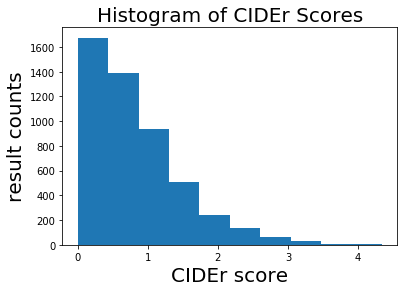

In [7]:
# plot score histogram
ciderScores = [eva['CIDEr'] for eva in cocoEval.evalImgs]
plt.hist(ciderScores)
plt.title('Histogram of CIDEr Scores', fontsize=20)
plt.xlabel('CIDEr score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()